Here I select 6 tropical orographic regions. For each region, I plot a cross-section of the mountain height perpendicular to the range; as well as a similar cross-section of the mean precip for the rainiest month of the year. The angle defining the orientation of each mountain range was chosen manually.

In [11]:
import os
import glob
import numpy as np
import xarray as xr
from scipy.ndimage import rotate

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import time
import cartopy.crs as ccrs
import cartopy


In [12]:
orogm=xr.open_dataarray("../../data/ERA5orography.nc").isel(time=0)/9.81
lsm=xr.open_dataarray("../../data/ERA5lsm.nc").isel(time=0)

In [13]:
trmmpr=xr.open_dataarray("../../data/TRMM.mnth.pr.20100101-20191231.nc")
trmmpr.coords['longitude'] = trmmpr.coords['longitude'] % 360
trmmpr = trmmpr.sortby(trmmpr.longitude)

In [26]:
#mountains=[([106,110,10,18],"Annamite range (Vietnam)",60),
#           ([73,78,9,17],"Western Ghats",70),
#           ([360-79,360-68,-17,-9],"Central Andes",45),
#           ([80,90,25,35],"Himalaya",10),
#           ([95,106,-6,6],"Bukit Barisan (Sumatra)",45),
#           ([135,150,-11,-1],"New Guinea highlands",10)
#          ]

mountains=[([102,113,10,18],"Annamite range (Vietnam)",60+180,11),
           ([70,80,9,17],"Western Ghats",70,7),
           ([95,106,-6,6],"Bukit Barisan (Sumatra)",45,11),
           ([135,150,-11,-1],"New Guinea highlands",10,3),
           ([360-82,360-68,-17,-9],"Central Andes",45+180,2),
           ([80,90,25,35],"Himalaya",10,7)
          ]

In [27]:
prdata=[]
for i,(lonlat,name,_,mnth) in enumerate(mountains):
    window=trmmpr.sel(longitude=slice(lonlat[0],lonlat[1]),latitude=slice(lonlat[2],lonlat[3])).groupby("time.month").mean("time").sel(month=mnth)
    prdata.append(24*np.array(window)[::-1,:]) #24 for mm/day
    

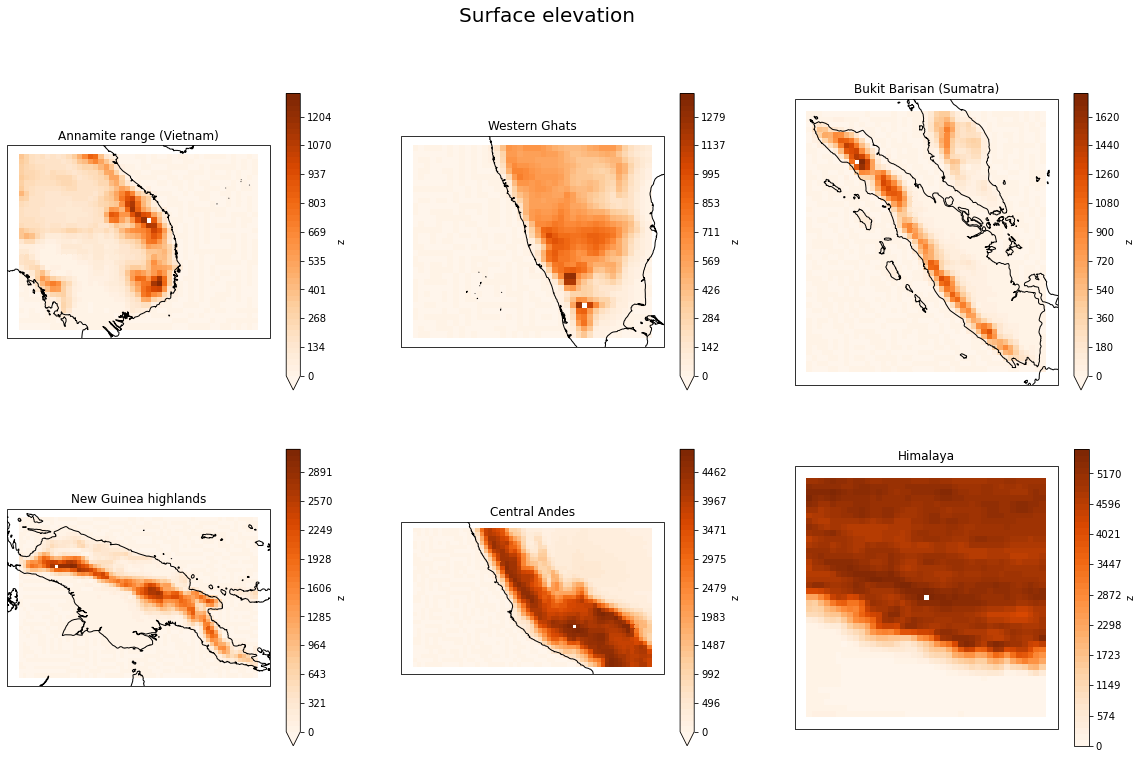

In [38]:
mountaindata = []
fig,ax = plt.subplots(2,3,figsize=(20,12),subplot_kw={"projection":ccrs.PlateCarree()})
ax = ax.reshape(-1)
for i,(lonlat,name,_,_) in enumerate(mountains):
    ax[i].coastlines()
    window=orogm.sel(longitude=slice(lonlat[0],lonlat[1]),latitude=slice(lonlat[3],lonlat[2]))
    mountaindata.append(np.array(window))
    window.plot(ax=ax[i],transform=ccrs.PlateCarree(),cmap=plt.cm.Oranges,levels=np.linspace(0,window.max()))
    ax[i].set_title(name)
fig.suptitle("Surface elevation",fontsize=20);None

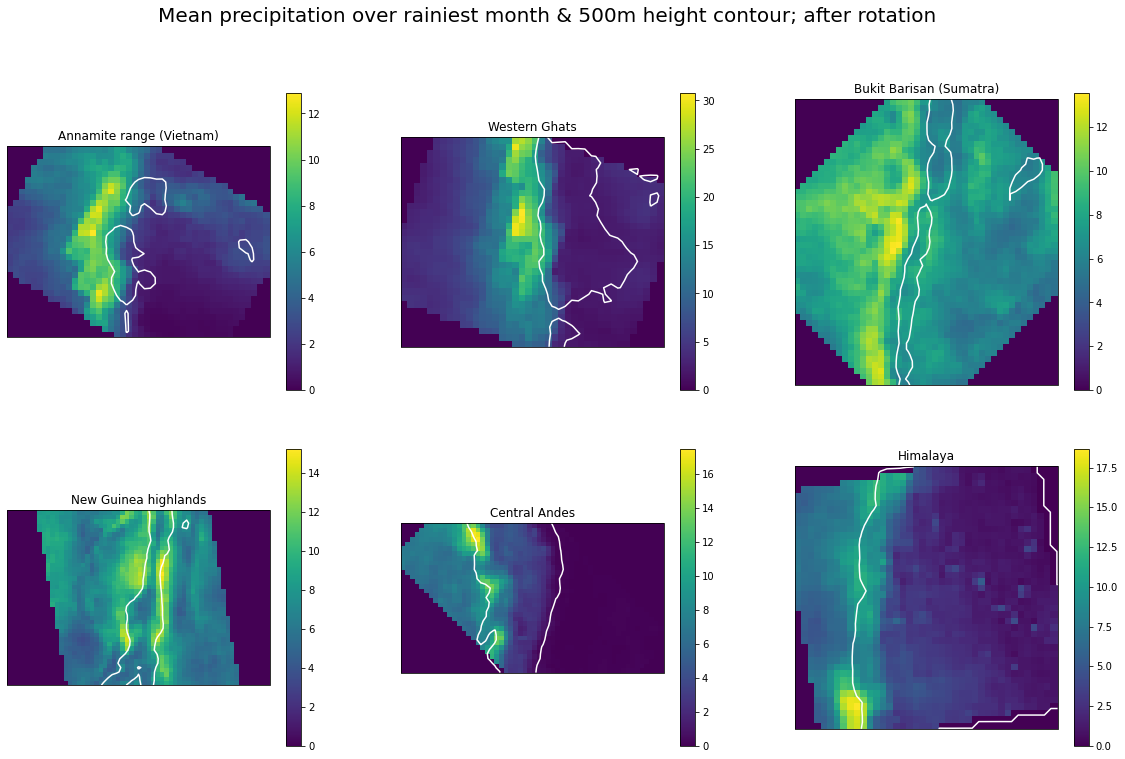

In [43]:
fig,ax = plt.subplots(2,3,figsize=(20,12),subplot_kw={"projection":ccrs.PlateCarree()})
ax = ax.reshape(-1)
for i,(lonlat,name,angle,_) in enumerate(mountains):
    orogwindow = mountaindata[i]
    window = prdata[i]
    ax[i].set_title(name)
    im=ax[i].pcolormesh(rotate(window[::-1],90-angle,reshape=False),cmap=plt.cm.viridis)#,levels=np.linspace(0,window.max()))
    fig.colorbar(im, ax=ax[i])
    ax[i].contour(rotate(orogwindow[::-1],90-angle,reshape=False),**{'levels':[500],'colors':['w']})
fig.suptitle("Mean precipitation over rainiest month & 500m height contour; after rotation",fontsize=20);None

/Users/quentin.nicolas/miniconda3/envs/atmos/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


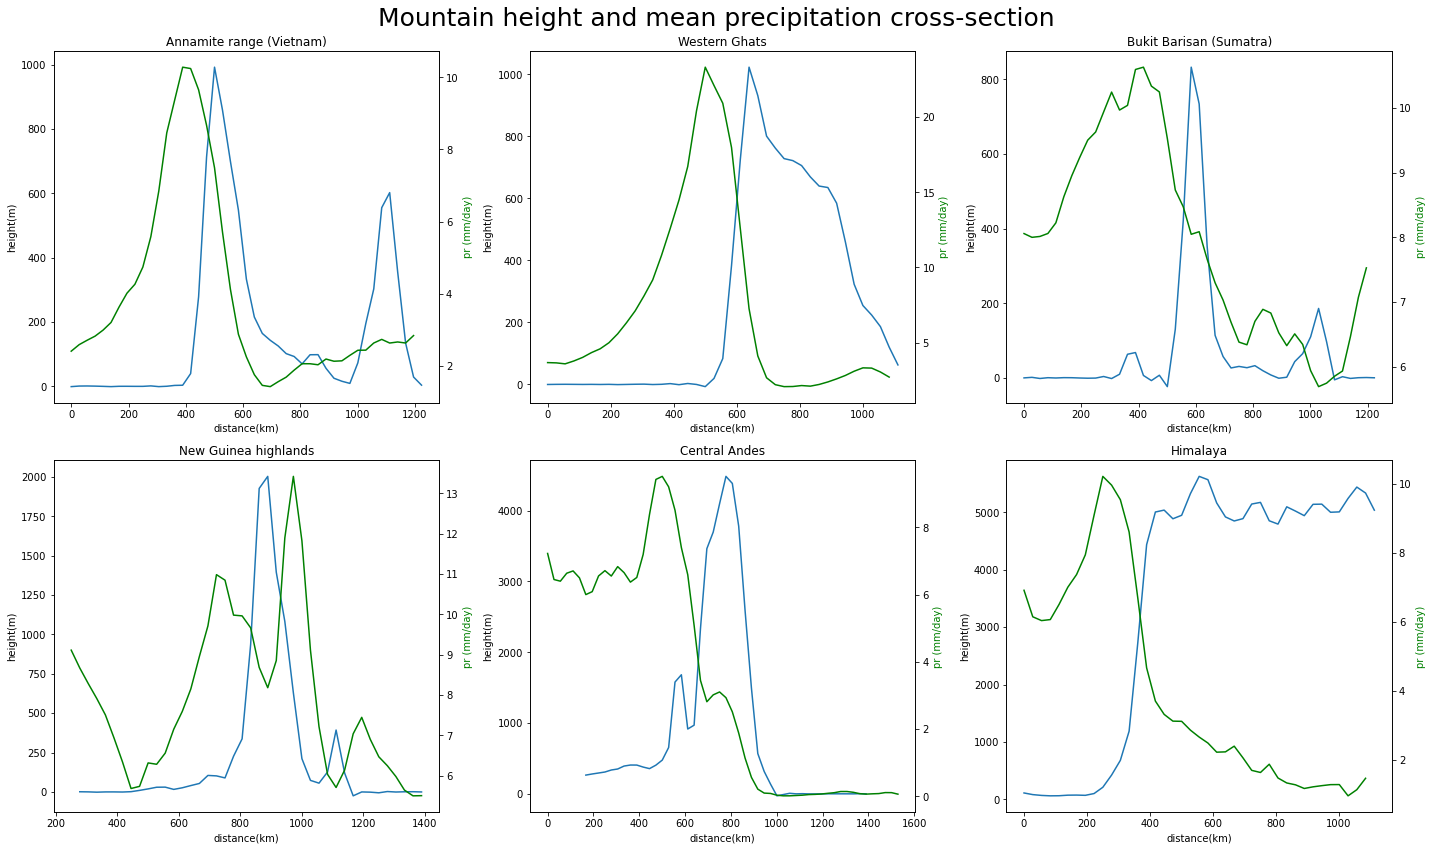

In [49]:
km_per_degreelat = 6370*np.pi/180
fig,ax = plt.subplots(2,3,figsize=(20,12))
ax = ax.reshape(-1)
for i,(lonlat,name,angle,_) in enumerate(mountains):
    
    window = mountaindata[i]
    ax[i].set_title(name)
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax[i].plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:])
    ax[i].set_xlabel("distance(km)")
    ax[i].set_ylabel("height(m)")

    window = prdata[i]
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax2=ax[i].twinx()
    ax2.set_ylabel('pr (mm/day)', color='g') #ax2.set_ylim(0,30);
    #ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:],'k')
    ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],np.nanmean(window_rot[n//4:3*n//4,:],axis=0),'g')

fig.suptitle("Mountain height and mean precipitation cross-section",fontsize=25)
fig.tight_layout()


/Users/quentin.nicolas/miniconda3/envs/atmos/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


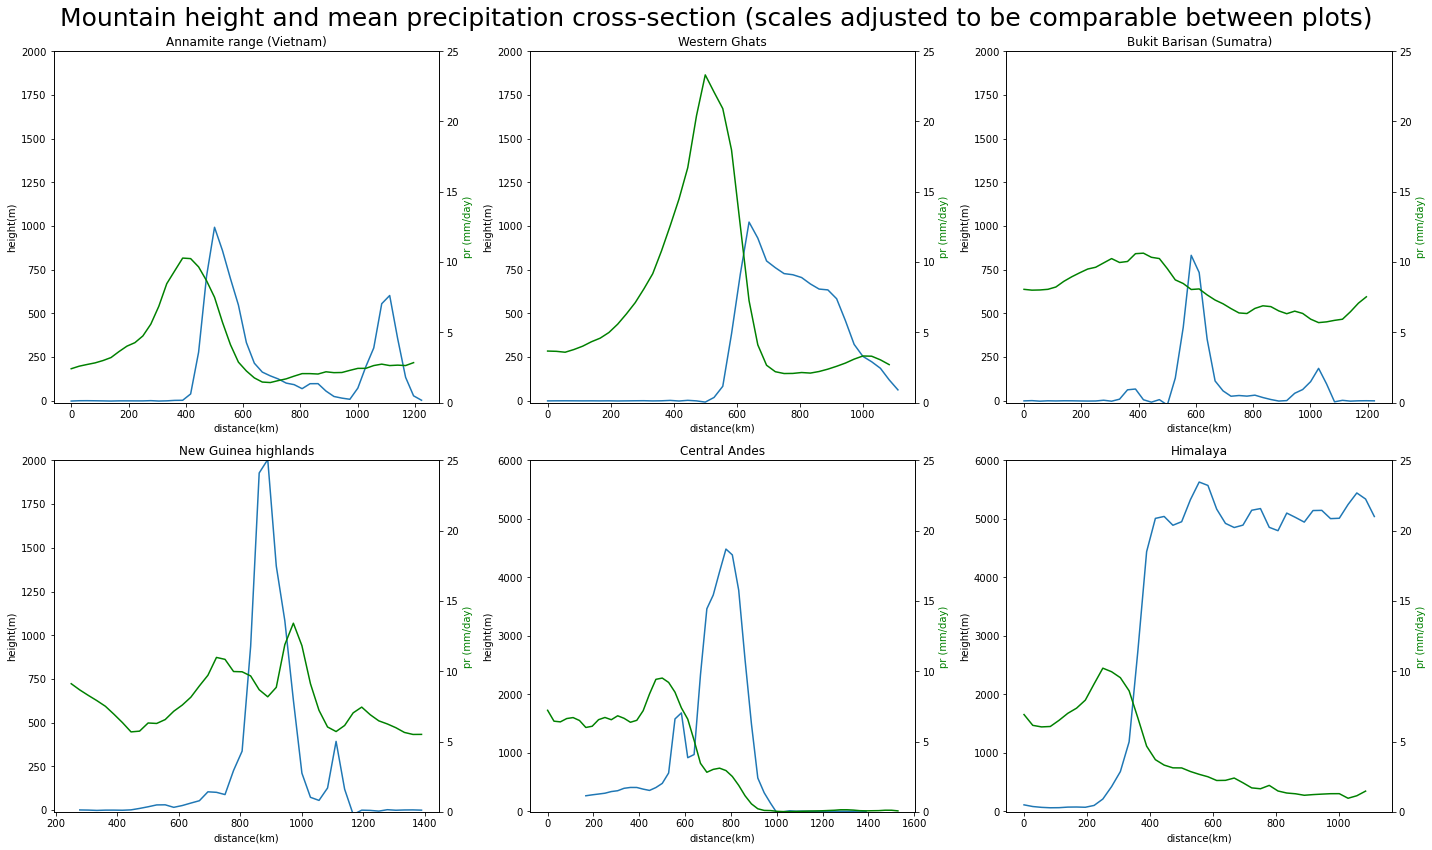

In [50]:
km_per_degreelat = 6370*np.pi/180
fig,ax = plt.subplots(2,3,figsize=(20,12))
ax = ax.reshape(-1)
for i,(lonlat,name,angle,_) in enumerate(mountains):
    
    window = mountaindata[i]
    ax[i].set_title(name)
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax[i].plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:])
    ax[i].set_xlabel("distance(km)")
    ax[i].set_ylabel("height(m)")
    if i<4:
        ax[i].set_ylim((-10,2000))
    else:
        ax[i].set_ylim((-10,6000))

    window = prdata[i]
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax2=ax[i].twinx()
    ax2.set_ylabel('pr (mm/day)', color='g') #ax2.set_ylim(0,30);
    #ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:],'k')
    ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],np.nanmean(window_rot[n//4:3*n//4,:],axis=0),'g')
    ax2.set_ylim(0,25)

fig.suptitle("Mountain height and mean precipitation cross-section (scales adjusted to be comparable between plots)",fontsize=25)
fig.tight_layout()
